In [1]:
# Importing Commom Libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
    CREATE TABLE Sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        category TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
)
""")

In [4]:
# Creating Variable for Input Rows
sample_data = [
('Apple iPhone 14', 'Electronics', 25, 799.99),
('Nike Air Max 270', 'Footwear', 40, 129.99),
('Samsung TV 55"', 'Electronics', 15, 499.50),
('Levi''s Jeans', 'Apparel', 60, 59.99),
('HP Pavilion 15', 'Computers', 12, 699.00),
('Sony WH-1000XM5', 'Electronics', 30, 349.95),
('Adidas Hoodie', 'Apparel', 45, 65.00),
('Instant Pot Duo', 'Kitchen', 22, 89.99),
('Logitech Mouse', 'Accessories', 80, 24.99),
('Kindle Paperwhite', 'Electronics', 18, 139.99),
('Dell XPS 13', 'Computers', 10, 999.99),
('NutriBullet Pro', 'Kitchen', 35, 79.95),
('Under Armour Shorts', 'Apparel', 50, 35.00),
('Bose SoundLink Flex', 'Electronics', 20, 149.00),
('Canon EOS M50', 'Electronics', 8, 649.00),
('Crocs Classic Clog', 'Footwear', 70, 44.99),
('Anker Power Bank', 'Accessories', 90, 39.99),
('Microsoft Surface Go 3', 'Computers', 9, 599.99),
('T-fal Frying Pan Set', 'Kitchen', 25, 49.99),
('Ray-Ban Wayfarer', 'Accessories', 33, 154.00)]

In [5]:
# Inserting rows in the table
cursor.executemany('INSERT INTO sales (product, category, quantity, price) VALUES (?, ?, ?, ?)', sample_data)

In [6]:
Data = pd.read_sql_query('SELECT * FROM sales', conn)
Data

,id,product,category,quantity,price
0,1,Apple iPhone 14,Electronics,25,799.99
1,2,Nike Air Max 270,Footwear,40,129.99
2,3,"Samsung TV 55""",Electronics,15,499.50
3,4,Levis Jeans,Apparel,60,59.99
4,5,HP Pavilion 15,Computers,12,699.00
5,6,Sony WH-1000XM5,Electronics,30,349.95
6,7,Adidas Hoodie,Apparel,45,65.00
7,8,Instant Pot Duo,Kitchen,22,89.99
8,9,Logitech Mouse,Accessories,80,24.99
9,10,Kindle Paperwhite,Electronics,18,139.99


In [7]:
# Define SQl Query for total revenue Product wise
query = '''
    select
        Product,
        sum(quantity) as Total_quantity,
        sum(price * price) as Revenue
    from sales
    group by product

'''

In [8]:
# Run Sql query and load it into pandas data frame
df = pd.read_sql_query(query, conn)
df

,product,Total_quantity,Revenue
0,Adidas Hoodie,45,4225.0000
1,Anker Power Bank,90,1599.2001
2,Apple iPhone 14,25,639984.0001
3,Bose SoundLink Flex,20,22201.0000
4,Canon EOS M50,8,421201.0000
5,Crocs Classic Clog,70,2024.1001
6,Dell XPS 13,10,999980.0001
7,HP Pavilion 15,12,488601.0000
8,Instant Pot Duo,22,8098.2001
9,Kindle Paperwhite,18,19597.2001


In [9]:
print(df)

                   product  Total_quantity      Revenue
0            Adidas Hoodie              45    4225.0000
1         Anker Power Bank              90    1599.2001
2          Apple iPhone 14              25  639984.0001
3      Bose SoundLink Flex              20   22201.0000
4            Canon EOS M50               8  421201.0000
5       Crocs Classic Clog              70    2024.1001
6              Dell XPS 13              10  999980.0001
7           HP Pavilion 15              12  488601.0000
8          Instant Pot Duo              22    8098.2001
9        Kindle Paperwhite              18   19597.2001
10             Levis Jeans              60    3598.8001
11          Logitech Mouse              80     624.5001
12  Microsoft Surface Go 3               9  359988.0001
13        Nike Air Max 270              40   16897.4001
14         NutriBullet Pro              35    6392.0025
15        Ray-Ban Wayfarer              33   23716.0000
16          Samsung TV 55"              15  2495

In [10]:
# Define sql query for total revenue Category wise
query1 = '''
    select
        Category,
        sum(quantity) as Total_quantity,
        sum(price * price) as Revenue
    from sales
    group by category

'''

In [11]:
#  Load Query Results into Pandas and Display
ds = pd.read_sql_query(query1, conn)
ds

,category,Total_quantity,Revenue
0,Accessories,203,2.593970e+04
1,Apparel,155,9.048800e+03
2,Computers,31,1.848569e+06
3,Electronics,116,1.474948e+06
4,Footwear,110,1.892150e+04
5,Kitchen,82,1.698920e+04


In [12]:
# query to remove database
# os.remove("sales_data.db")

###  Plotting Bar Chart

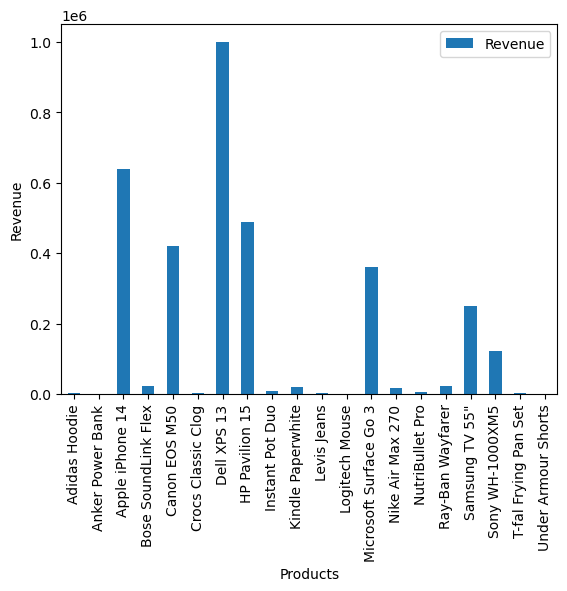

In [13]:
# Plotting Revinue for Category
df.plot(kind='bar', x='product', y='Revenue', legend=True)
plt.title=('Revenue by Category')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.show()

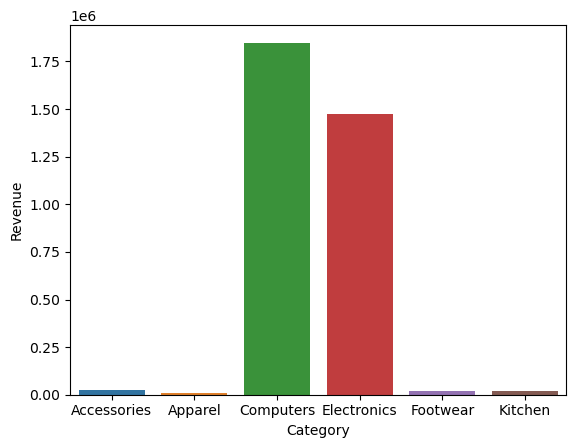

In [14]:
import seaborn as sns
sns.barplot(data=ds, x='category', y='Revenue')
plt.title=('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

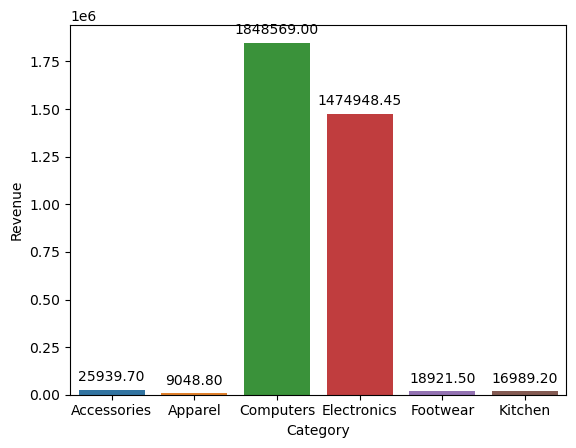

In [15]:
# took suggestion from colab 'AI'
ax = sns.barplot(data=ds, x='category', y='Revenue')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title=('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()